In [2]:
# Import the machine learning libraries.
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import metrics

In [3]:
# Load the Human Activity Recognition Using Smartphones dataset.
# The dataset can be downloaded here: https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones.
train = shuffle(pd.read_csv("train.csv"))
test = shuffle(pd.read_csv("test.csv"))

In [4]:
print(train.shape, test.shape)

(7352, 563) (2947, 563)


In [5]:
train.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
5635,0.348365,0.061673,-0.053334,0.127036,-0.271349,-0.250435,0.027827,-0.291141,-0.286538,0.438846,...,-0.752914,-0.179503,0.714692,-0.511509,-0.035491,-0.847839,0.151238,-0.077499,26,WALKING_DOWNSTAIRS
3255,0.276647,-0.017646,-0.106592,-0.995632,-0.989836,-0.996694,-0.996714,-0.988527,-0.996318,-0.940484,...,-0.947674,0.298777,-0.378397,0.461111,-0.345491,-0.670536,0.218627,0.217504,17,STANDING
5458,0.161610,0.001877,-0.088456,-0.473340,-0.146694,-0.199407,-0.518846,-0.192398,-0.128791,-0.284777,...,-0.792476,0.826324,-0.432949,-0.907831,0.131956,-0.787769,0.244190,0.031887,25,WALKING_UPSTAIRS
5375,0.205379,-0.080617,0.010700,-0.954531,-0.825695,-0.812239,-0.955896,-0.819543,-0.807501,-0.925065,...,-0.741152,0.022598,-0.180836,-0.344488,0.142743,0.586552,-0.529712,-0.476248,25,LAYING
5145,0.362738,0.021304,-0.475139,-0.899308,-0.835325,-0.788868,-0.897895,-0.863483,-0.777296,-0.805650,...,-0.525541,0.084593,0.118643,0.023821,-0.385772,0.565836,-0.799503,-0.194921,25,LAYING
6015,0.279700,-0.004397,-0.109520,0.359081,0.119909,-0.177541,0.337963,0.066883,-0.221876,0.474093,...,-0.133106,0.049658,0.602595,0.681696,0.513330,-0.862824,0.190833,0.038933,27,WALKING_DOWNSTAIRS
7170,0.278465,0.049577,-0.078986,-0.893152,-0.826829,-0.923960,-0.945484,-0.801600,-0.926195,-0.709588,...,-0.597059,-0.014367,-0.812606,-0.805701,0.243491,-0.917932,0.092721,-0.043061,30,STANDING
2380,0.281960,-0.029525,0.002162,-0.300699,0.122331,0.611601,-0.336616,0.117050,0.596454,-0.124361,...,-0.882865,0.258418,-0.867018,0.973123,-0.397219,-0.404084,0.314413,0.369649,14,WALKING_UPSTAIRS
3394,0.199118,0.041223,-0.120062,-0.180991,-0.260253,-0.113017,-0.225105,-0.286955,-0.068529,-0.058097,...,-0.864901,0.360055,0.512898,0.952441,0.311913,-0.552304,0.215513,0.313384,17,WALKING_UPSTAIRS
6764,0.429600,-0.040108,0.036433,0.155879,-0.272094,-0.142732,0.077495,-0.304422,-0.108450,0.530378,...,-0.803191,-0.412177,0.547173,-0.940131,-0.055514,-0.914587,0.118339,-0.041268,29,WALKING_DOWNSTAIRS


In [6]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [7]:
# Try to find the missing values.
print("Missing values in the training set:", train.isnull().values.any())
print("Missing values in the test set:", test.isnull().values.any())

Missing values in the training set: False
Missing values in the test set: False


In [8]:
# Count up frequency distribution of classes.
train_outcome = pd.crosstab(index=train["Activity"], columns="count")
train_outcome

col_0,count
Activity,
LAYING,1407
SITTING,1286
STANDING,1374
WALKING,1226
WALKING_DOWNSTAIRS,986
WALKING_UPSTAIRS,1073


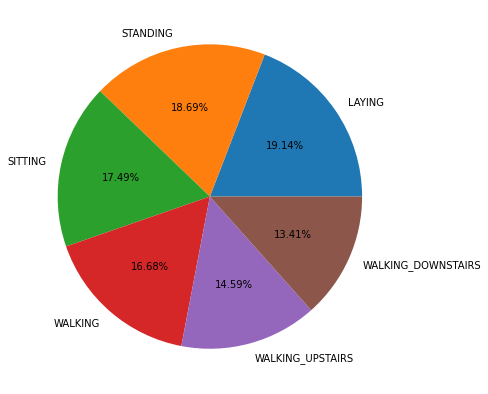

In [9]:
# Visualize frequency distribution of classes.
temp = train["Activity"].value_counts()
df = pd.DataFrame({'labels': temp.index, 'values': temp.values})
labels = df['labels']
sizes = df['values']
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.show()

In [10]:
# Split the dataset into the training set and test subsets.
X_train = pd.DataFrame(train.drop(['Activity','subject'], axis=1))
y_train = train.Activity.values.astype(object)
X_test = pd.DataFrame(test.drop(['Activity','subject'], axis=1))
y_test = test.Activity.values.astype(object)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7352, 561) (2947, 561) (7352,) (2947,)


In [11]:
print(y_train[:20])

['WALKING_DOWNSTAIRS' 'STANDING' 'WALKING_UPSTAIRS' 'LAYING' 'LAYING'
 'WALKING_DOWNSTAIRS' 'STANDING' 'WALKING_UPSTAIRS' 'WALKING_UPSTAIRS'
 'WALKING_DOWNSTAIRS' 'LAYING' 'SITTING' 'WALKING_UPSTAIRS' 'STANDING'
 'STANDING' 'SITTING' 'WALKING_UPSTAIRS' 'WALKING_DOWNSTAIRS' 'STANDING'
 'SITTING']


In [12]:
from sklearn import preprocessing

# Encode target labels with value between 0 and n_classes-1.
encoder = preprocessing.LabelEncoder()

# Fit label encoder and return encoded labels.
encoder.fit(y_train)
y_train = encoder.transform(y_train)

# Fit label encoder and return encoded labels.
encoder.fit(y_test)
y_test = encoder.transform(y_test)

In [13]:
print(y_train[:20])

[4 2 5 0 0 4 2 5 5 4 0 1 5 2 2 1 5 4 2 1]


In [14]:
num_cols = X_train._get_numeric_data().columns
names_of_predictors = list(X_train.columns.values)
print("Number of features:", num_cols.size)

Number of features: 561


In [15]:
# Standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
print(X_train_scaled[:1])

[[ 1.05153385e+00  1.94493463e+00  9.85451251e-01  1.63242387e+00
   4.76687466e-01  8.46320485e-01  1.55252605e+00  4.85207626e-01
   7.71835188e-01  1.66654624e+00  6.80424658e-01  1.61950331e+00
  -1.40487865e+00 -3.20735297e-01 -1.10993463e+00  1.12864776e+00
   1.75885538e+00  1.30854058e-01  4.72012868e-01  1.03559781e+00
   3.87505620e-01  7.16596428e-01  1.45726436e-01  1.52282229e+00
   1.24543158e+00 -1.09470436e+00  7.68682219e-01 -5.39207194e-01
   7.98800649e-01 -9.75168459e-01  1.13578627e+00 -5.30973632e-01
  -3.21080073e-01 -6.63235497e-01  9.66529139e-01  1.98307485e-01
  -5.61367481e-01 -2.67300822e-01  1.20836477e+00 -3.35280311e-01
   5.18292692e-01 -2.90119063e-01  1.30202344e-01  2.47315526e-01
   1.60465605e+00  7.44136077e-02  1.51107105e-01  1.67796536e+00
   2.66191470e-03  5.52471378e-01 -1.75891965e-01  1.33615770e-01
   5.03857732e-01 -3.90728811e-01  1.10800380e-01 -1.03000924e+00
   5.45516948e-01 -5.83599752e-01 -5.04180241e-01 -4.17508144e-02
   1.78908

In [17]:
# Specify range of hyperparameters for linear and non-linear regression model using SVM models.
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [22]:
# Create a KFold object with 10 splits.
%%time
folds = KFold(n_splits=10, shuffle=True, random_state=0)

# Set the parameters by cross-validation.
# Set up GridSearchCV() funcion.
svm_model = GridSearchCV(SVC(), params_grid, scoring='accuracy', cv=folds)
svm_model.fit(X_train_scaled, y_train)
print('Best score for the training data:', svm_model.best_score_) 

# Print the best parameters for the model using grid search.
print('Best C:', svm_model.best_estimator_.C) 
print('Best Kernel:', svm_model.best_estimator_.kernel)
print('Best Gamma:', svm_model.best_estimator_.gamma)

final_model = svm_model.best_estimator_
y_pred = final_model.predict(X_test_scaled)
y_pred_label = list(encoder.inverse_transform(y_pred))

UsageError: Line magic function `%%time` not found.


In [78]:
# Confusion Matrix.
print(confusion_matrix(y_test, y_pred))

[[537   0   0   0   0   0]
 [  3 439  48   0   0   1]
 [  0  11 521   0   0   0]
 [  0   0   0 486   4   6]
 [  0   0   0   6 389  25]
 [  0   0   0  15   2 454]]


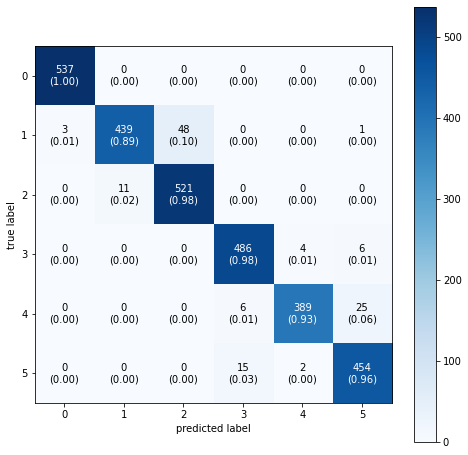

In [85]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      figsize=(8,8))
plt.show()

In [79]:
# Print classificatin report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       537
           1       0.98      0.89      0.93       491
           2       0.92      0.98      0.95       532
           3       0.96      0.98      0.97       496
           4       0.98      0.93      0.95       420
           5       0.93      0.96      0.95       471

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



In [76]:
print("Training set score for SVM: %f" % final_model.score(X_train_scaled , y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test_scaled  , y_test))

Training set score for SVM: 1.000000
Testing  set score for SVM: 0.958941
